# <center style="color: #4CAF10; font-size: 52px; font-weight: bold;">Iris Classification</center>


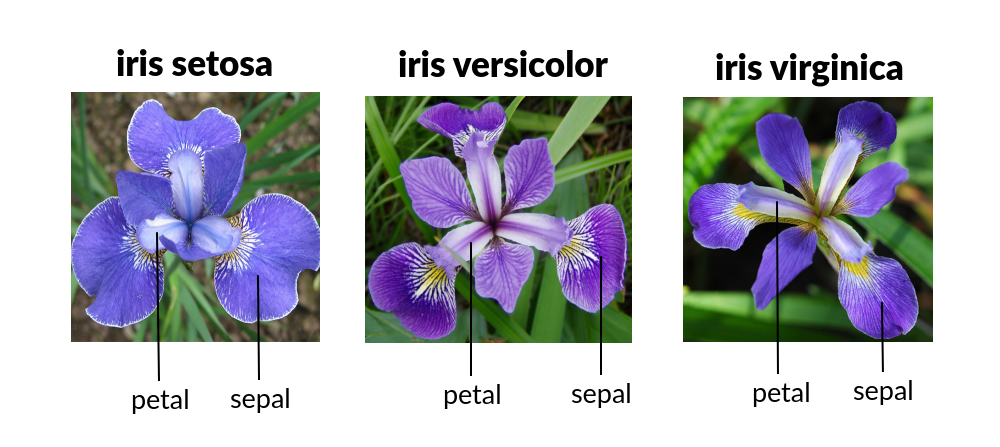

## Importing the Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy.stats import pearsonr 
import warnings 
warnings.filterwarnings('ignore')

## Dataset loading

In [2]:
df = pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Data preprocessing

In [3]:
'''Data Statistics'''

df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
''' DataTypes details '''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
''' Check for dataset has null values '''

df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
''' Check if the Duplicate rows ''' 

df.duplicated().sum()

0

In [7]:
''' Drop the ID Column '''
 
df.drop(columns=["Id"], inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
x = df[features].values #Input
y = df["Species"].values #Output

### Box plot

<Axes: >

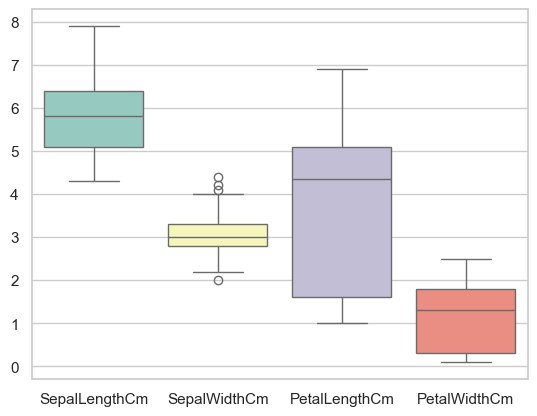

In [9]:
'''Plotting the data to find outliers'''

sns.set(style="whitegrid", palette="Set3")
sns.boxplot(data=df)

### Joint Plot

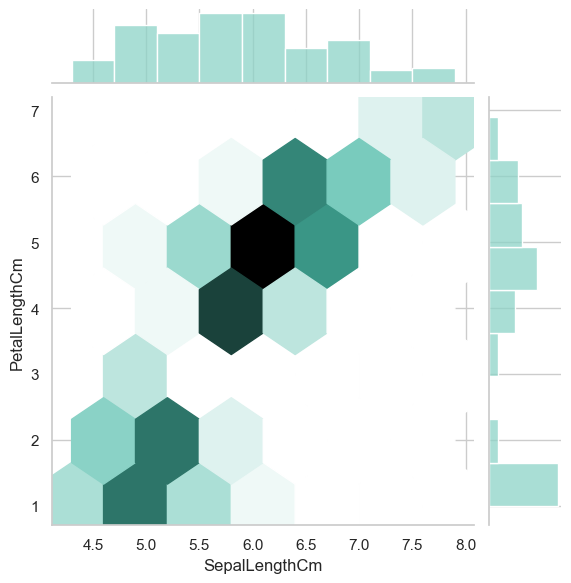

In [10]:
sns.jointplot(x=df['SepalLengthCm'], y=df['PetalLengthCm'], data=df, kind='hex')

### Pair plot

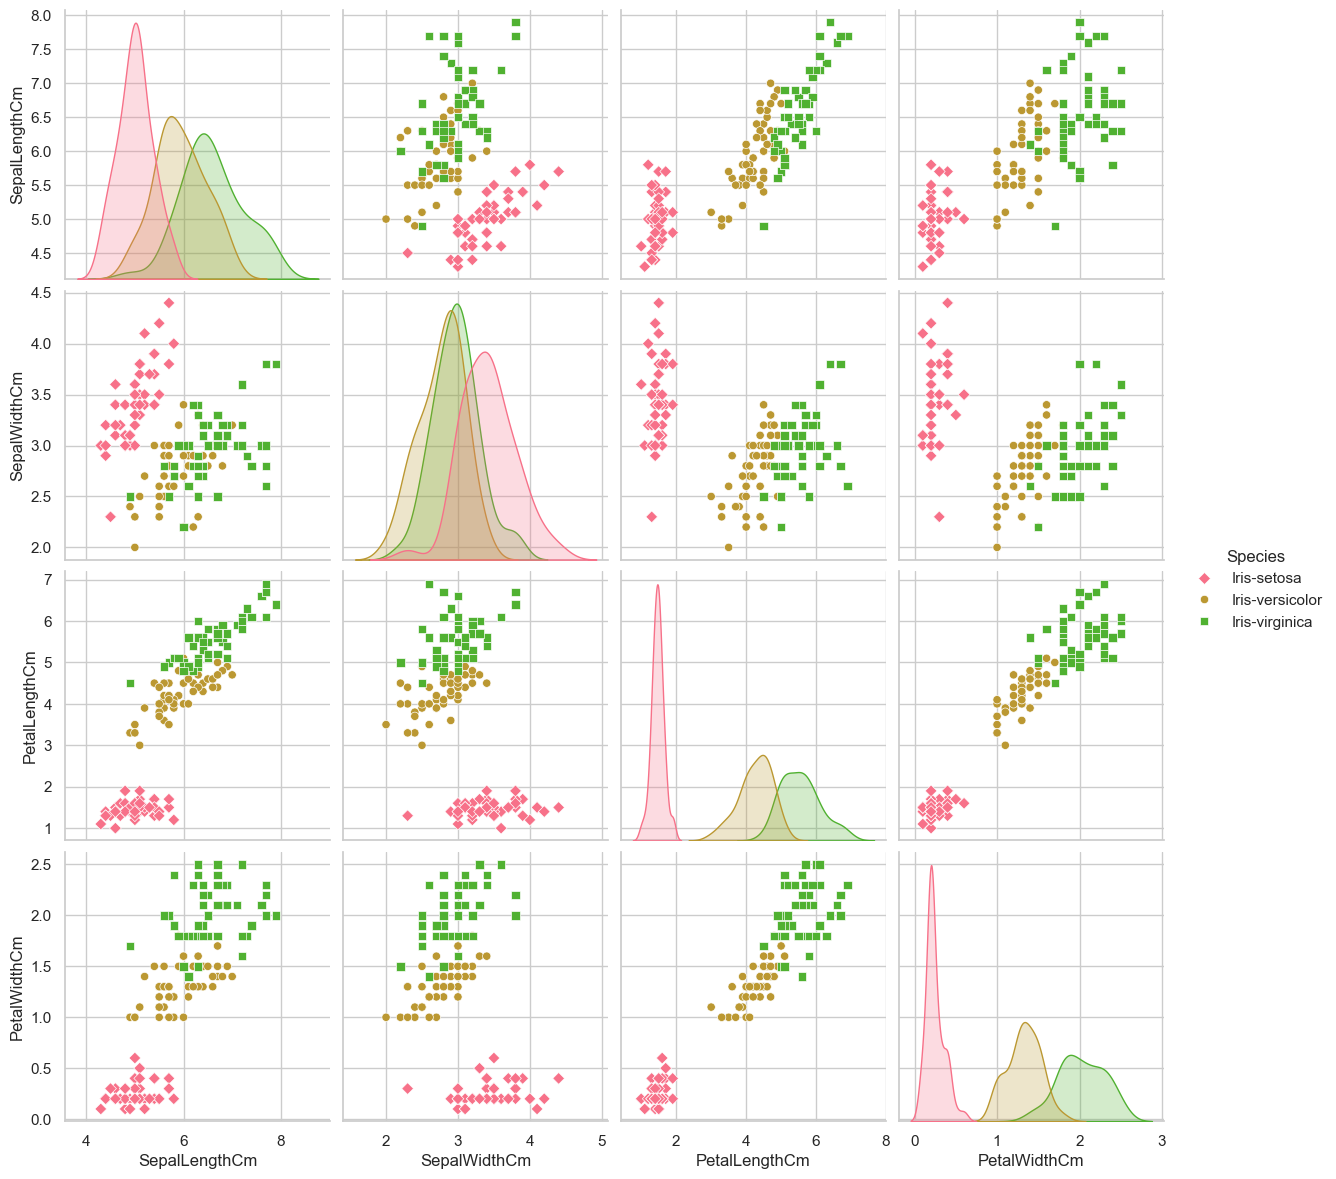

In [11]:
sns.set_style("whitegrid")
sns.set_palette("husl")
sns.pairplot(df, hue="Species", size=3, markers=["D", "o", "s"])

### Feature Scaling

In [12]:
''' Splitting  Train and Test '''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Label Encoder

In [13]:
''' Label Encoder '''
# Convert categorical variables into numerical format.

from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
label_enc.fit(y)

LabelEncoder()

In [14]:
# Use mapping method to add the index to decode the output. 

mapping = dict(zip(label_enc.classes_, range(len(label_enc.classes_))))
mapping

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [15]:
y = label_enc.transform(y)

### Standard Scaler

In [16]:
''' Normalization '''

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [17]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Training

In [18]:
'''Libraries'''

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### Logistic Regression

In [19]:
'''Logistic Regression model'''
 
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [20]:
model_prediction = model.predict(X_test_scaled)

In [21]:
accuracy_score(model_prediction, y_test)

1.0

### K-Nearest Neighbors

In [22]:
'''K-Nearest Neighbors (KNN) Model'''

classi = KNeighborsClassifier(n_neighbors=3)
classi.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
class_pred = classi.predict(X_test_scaled)

In [24]:
accuracy_score(y_test, class_pred)

0.9666666666666667

### Support Vector Classifier (SVC)

In [25]:
''' Support Vector Classifier (SVC) Model ''' 

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [26]:
svc_pred = svc.predict(X_test_scaled)

In [27]:
accuracy_score(y_test, svc_pred)

1.0

### Naive Bayes

In [28]:
''' Naive Bayes model '''

from sklearn.naive_bayes import GaussianNB

naive_b = GaussianNB()
naive_b.fit(X_train_scaled, y_train)

GaussianNB()

In [29]:
naive_b_pred = naive_b.predict(X_test_scaled)

In [30]:
accuracy_score(y_test, naive_b_pred)

0.9666666666666667

## Model Evaluation

Confusion Matrix

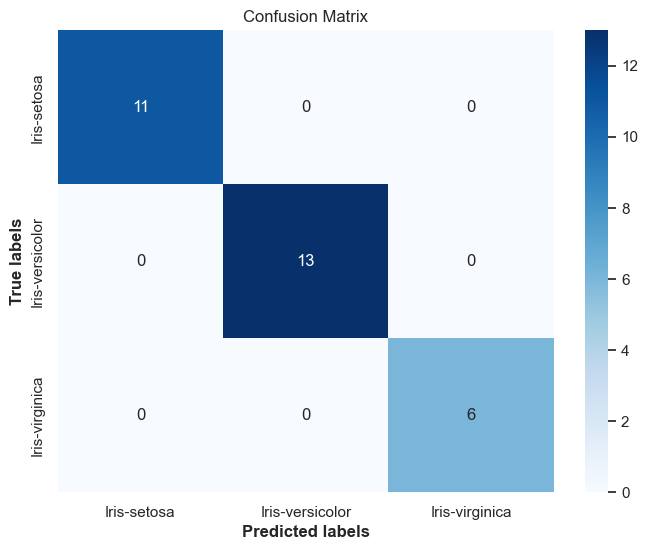

In [38]:
class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
cm1 = confusion_matrix(y_test, model_prediction)
plt.figure(figsize=(8, 6))
sns.heatmap(cm1, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontweight='bold')
plt.ylabel('True labels', fontweight='bold')
plt.title('Confusion Matrix')
plt.show()

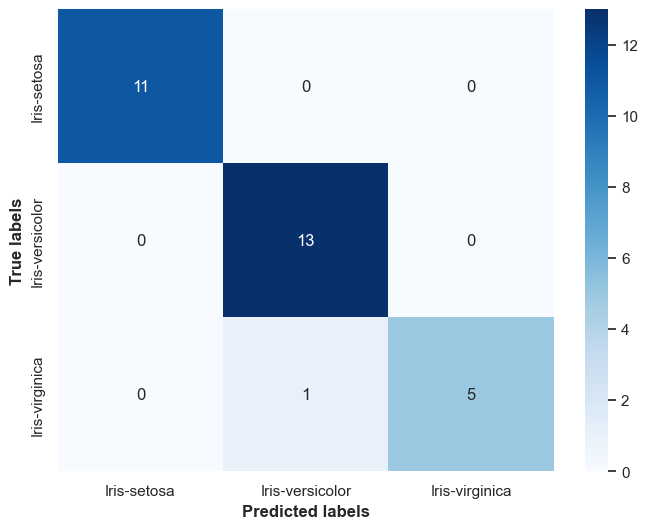

In [39]:
cm2 = confusion_matrix(y_test, class_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontweight='bold')
plt.ylabel('True labels', fontweight='bold')
plt.show()

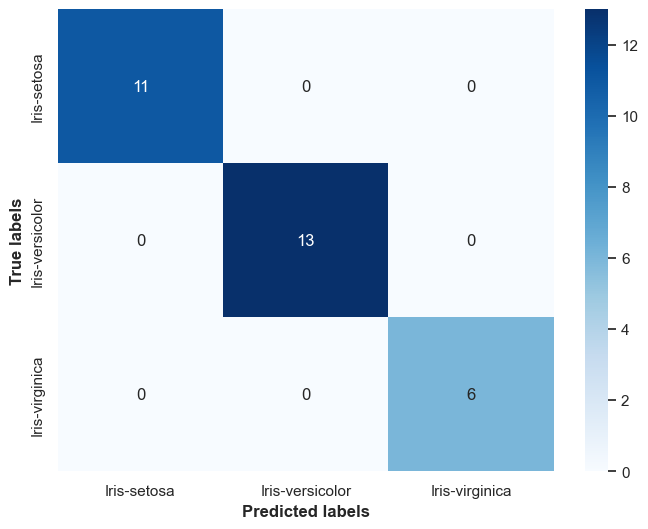

In [40]:
cm3 = confusion_matrix(y_test, svc_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontweight='bold')
plt.ylabel('True labels', fontweight='bold')
plt.show()

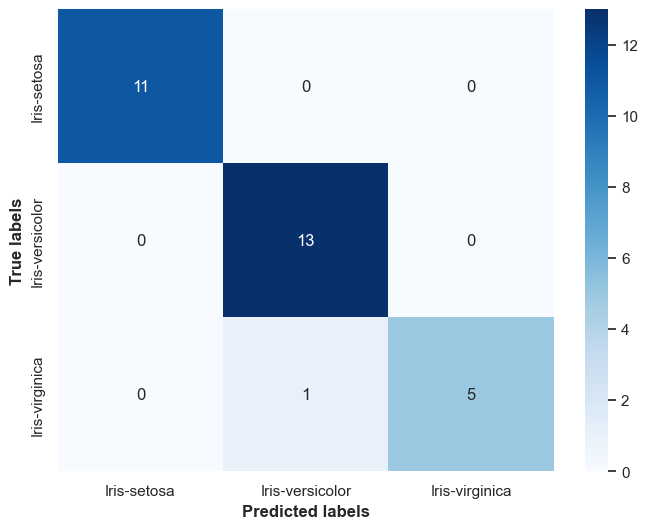

In [41]:
cm4 = confusion_matrix(y_test, naive_b_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm4, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels', fontweight='bold')
plt.ylabel('True labels', fontweight='bold')
plt.show()

## Combined model scores

In [42]:
''' All Model Scores '''

results = pd.DataFrame({
    'Model' : ['Logistic Regression', 'SVM', 'KNN', 'Naive Bayes'],
    'Score' : [1.0, 1.0, 0.96, 0.96]
})

results_df = results.sort_values(by="Score", ascending=False)
results_df = results_df.set_index('Model')
results_df.reset_index()

,Model,Score
0,Logistic Regression,1.00
1,SVM,1.00
2,KNN,0.96
3,Naive Bayes,0.96


## Prediction with model pkl file

In [43]:
#### To save the model in a pkl file
import pickle as pkl

pkl.dump(model, open('model.pkl', 'wb'))
pkl.dump(scaler, open('scaler.pkl', 'wb'))

In [44]:
# load the scalar.pkl
with open('scaler.pkl', 'rb') as scaler_file:
    data = pkl.load(scaler_file)

In [46]:
# Normalize using standard scalar 
sample_input = np.array([2.0, 5.8, 2.8, 4.2]).reshape(-1,4)
processdata = data.transform(sample_input)

In [50]:
# load the model.pkl
with open('model.pkl', 'rb') as model_file: 
    model_data = pkl.load(model_file)

# Find ypred 
model_predict = model_data.predict(processdata)

# Print the predicted class with decoded catergory label
print(model_predict)

['Iris-setosa']
